### Text Mining HW01

#### Problem 1

Using the contents of the openAPI.txt file, proceed with the preprocessing step by step below and answer the questions.

In [1]:
import os
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/Webscraping/Homeworks'

In [3]:
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/Webscraping'

In [5]:
file_path = './Data/openAPI.txt'
with open(file_path) as file :
    raw_review = file.read()
#print(raw_review)

Remove HTML tags and extract text only (Beautiful Soup use)

In [6]:
from bs4 import BeautifulSoup
review_text = BeautifulSoup(raw_review, 'html.parser').get_text()

Convert non-alphabetic characters to spaces

In [7]:
import re
letters_only = re.sub('[^a-zA-Z]', ' ', review_text)

Convert to lower case

In [9]:
lower_latters = letters_only.lower().split() # list

stop words removed (using nltk's englist stopwords)

In [10]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [11]:
stops = set(stopwords.words('english'))

In [12]:
meaningful_words = [word for word in lower_latters if not word in stops]

Stem extraction (using `PorterStemmer()`)

In [14]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemming_words = [ps.stem(word) for word in meaningful_words]

One Combining strings with spaces (using join)

In [17]:
combined = ' '.join(stemming_words)
combined

'open api wikipedia open api wikipedia free encyclopedia jump navig jump search articl open vs privat api web servic specif see openapi specif open api often refer public api publicli avail applic program interfac provid develop programmat access proprietari softwar applic web servic api set requir govern one applic commun interact anoth api also allow develop access certain intern function program although typic case web api simplest term api allow one piec softwar interact anoth piec softwar whether within singl comput via mechan provid oper system intern extern tcp ip base non tcp ip base network current mani api provid organ access http api may use develop insid organis publish api develop outsid organis wish regist access interfac content characterist open api versu privat api privat api open api open api busi open api web see also extern link refer characterist edit open api three main characterist avail use develop user rel restrict restrict might includ necess regist servic pro

**(1) Among the words obtained in step 5 of the preprocessing task , how many words are obtained in total if duplicates are removed?**

In [28]:
print(f'It can obtain {len(set(meaningful_words))} words when duplicates are removed')

It can obtain 547 words when duplicates are removed


**(2) How many times does the word ' api ' occur in total?**

In [29]:
print(f'{meaningful_words.count("api")} times are occurred in text')

41 times are occurred in text


**(3) What is the third most frequent [ word ] and what is the [ corresponding frequency ]?**

In [35]:
from collections import Counter
third_word, freq = Counter(meaningful_words).most_common(10)[2]
print(f'The third most frequent word is "{third_word}" and its frequency is {freq}')

The third most frequent word is "apis" and its frequency is 36


**(4) Using the word-frequency relationship obtained above and the code below, draw a graph of the top 20 word frequencies**

In [36]:
import matplotlib.pyplot as plt
freq_words = Counter(meaningful_words).most_common(20)
keywords = [key[0] for key in freq_words]
freq = [freq[1] for freq in freq_words]

In [43]:
def plot_word_freq(keywords : list, freq : list) -> None :
    plt.figure(figsize = (10, 4))
    plt.bar(keywords, freq)
    plt.xlabel('words', fontfamily = 'Serif')
    plt.ylabel('freqency', fontfamily = 'Serif')
    plt.xticks(rotation = 90)
    plt.title('word - frequency relationship', fontsize = 12, fontfamily = 'Serif')
    plt.show()
    
def main() -> None : plot_word_freq(keywords, freq)

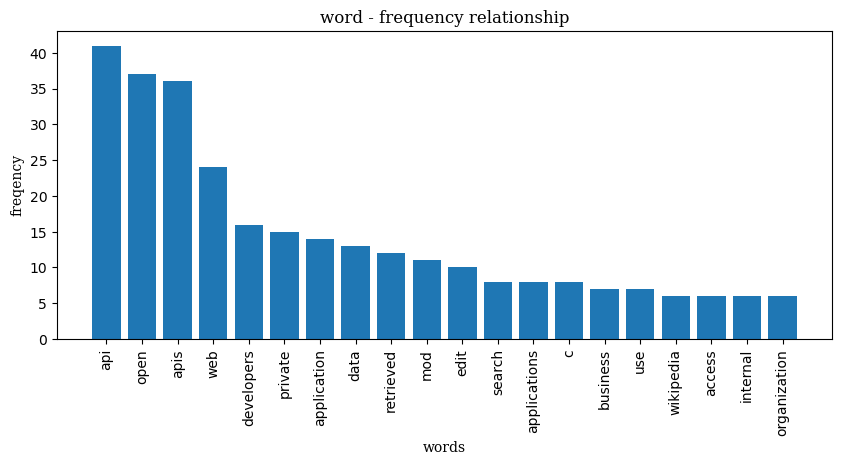

In [44]:
if __name__ == '__main__' : main();

**(5) Obtain 2- gram using the functions below, and find the frequency of the word combination { open api }**

In [46]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [51]:
from nltk.tokenize import word_tokenize 
from nltk.util import ngrams

def get_ngrams(text : str, nums : int) -> list :
    n_grams = ngrams(word_tokenize(text), nums)
    out = [' '.join(grams) for grams in n_grams]
    return out

n_gram = get_ngrams(combined, 2)

**(6) Draw a frequency graph like (4) using the two-word-frequency relationship obtained in (5) above**

In [54]:
freq_words = Counter(n_gram).most_common(20)
keywords = [key[0] for key in freq_words]
freq = [freq[1] for freq in freq_words]

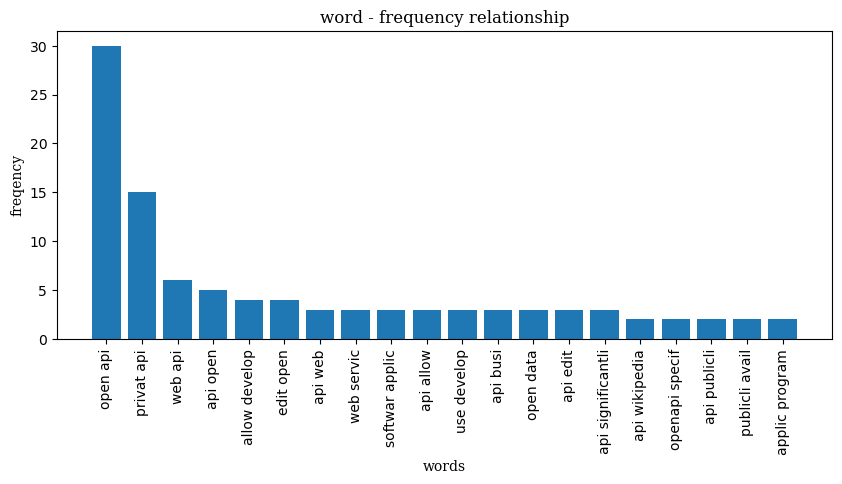

In [55]:
if __name__ == '__main__' : main();

#### Problem 2

In coin.zip, there are 5 cryptocurrency-related whitepaper txt files. Create a folder called coin in the Colab , and unzip these files. Save them in txt format, and answer the questions below